In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime

# File to Load 
satellite_data = "resources/UCS-Satellite-Database-8-1-2020.csv"


# Read satellite data file and store into Pandas DataFrames
satellite_df = pd.read_csv(satellite_data)


# View Data
satellite_df

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3Cat-1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Ziyuan 1-02C,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2783,Ziyuan 1-2D,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2784,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2785,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Drop duplicate satellite names column. Only using current official satellite name
cleaned_data = satellite_df.drop(columns =['Name of Satellite, Alternate Names'])
cleaned_data = cleaned_data.drop(columns = ['Unnamed: 28' , 'Unnamed: 31'])


#Drop Unnamed columns
col_index = 37
for x in range(30):
    cleaned_data = cleaned_data.drop(columns = [f'Unnamed: ' + str(col_index) ])    
    col_index = col_index + 1
    

In [3]:
# Remove sources columns
cleaned_data = cleaned_data.drop(columns = ['Source'])

source_index = 1
for x in range(5):
    cleaned_data = cleaned_data.drop(columns = [f'Source.' + str(source_index) ])    
    source_index = source_index + 1

cleaned_data

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,12/11/2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20
1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,11/29/2018,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,NaN,0.0,...,6/23/2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,2/6/2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,12/22/2011,NaN,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2011-079A,38038,Can acquire high-resolution data through remot...,SC - ASCR
2783,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,9/14/2019,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528,Hyperspectral imaging,JMSatcat/11_19
2784,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,1/9/2012,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046,Land survey satellite.,www.spacedebris.net 12/12
2785,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,5/29/2016,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2016-033A,41556,Thought to be for intelligence gathering.,Space50


In [4]:
#Add a column with the launch year extraceted from launch date

cleaned_data['Launch Year'] = pd.DatetimeIndex(cleaned_data['Date of Launch']).year


In [5]:
#Replace NA values in Expected Lifetime with 0 for easier analysis

cleaned_data[['Expected Lifetime (yrs.)']] = cleaned_data[['Expected Lifetime (yrs.)']].fillna(value=0)
cleaned_data['Expected Lifetime (yrs.)'] = cleaned_data['Expected Lifetime (yrs.)'].astype(float)
cleaned_data['Launch Year'] = cleaned_data['Launch Year'].astype(int)
cleaned_data[['Detailed Purpose']] = cleaned_data[['Detailed Purpose']].fillna(value='Unknown')
cleaned_data[['Type of Orbit']] = cleaned_data[['Type of Orbit']].fillna(value='Unknown')
cleaned_data[['Comments']] = cleaned_data[['Comments']].fillna(value='Unknown')


#View final cleaned dataframe
cleaned_data.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,2019
1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,0.0,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated,2018
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17,2017
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,0.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50,2016
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,75.0,...,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA,2014


In [6]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"

cleaned_data.to_csv("resources/cleaned_data.csv", encoding="utf-8", index=False)

In [7]:
#Use this cell to load data for plotting and analysis

# File to Load 
cleaned_satellite_data = "resources/cleaned_data.csv"


# Read satellite data file and store into Pandas DataFrames
cleaned_satellite_df = pd.read_csv(cleaned_satellite_data)


# View Data
# Note columns in middle not displayed due to size limitation on pandas display. 

cleaned_satellite_df


,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,2019
1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,0.0,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated,2018
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17,2017
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,0.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50,2016
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,75.0,...,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Unknown,LEO,Sun-Synchronous,0.0,...,0.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2011-079A,38038,Can acquire high-resolution data through remot...,SC - ASCR,2011
2783,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Unknown,LEO,Sun-Synchronous,0.0,...,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528,Hyperspectral imaging,JMSatcat/11_19,2019
2784,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Unknown,LEO,Sun-Synchronous,0.0,...,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046,Land survey satellite.,www.spacedebris.net 12/12,2012
2785,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Unknown,LEO,Sun-Synchronous,0.0,...,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2016-033A,41556,Thought to be for intelligence gathering.,Space50,2016


In [8]:
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None

In [9]:
#How many satellites does a given country have in orbit, and what are they used for?
orbit_countries = cleaned_satellite_df['Country of Operator/Owner'].value_counts()
orbit_countries

USA                1406
China               375
Russia              170
United Kingdom      129
Japan                80
                   ... 
Morocco/Germany       1
USA/Mexico            1
Jordan                1
Ukraine               1
Ethiopia              1
Name: Country of Operator/Owner, Length: 102, dtype: int64

In [10]:
country_purpose = cleaned_satellite_df[['Country of Operator/Owner', 'Purpose']] 
country_purpose


,Country of Operator/Owner,Purpose
0,USA,Earth Observation
1,Spain,Technology Development
2,Finland,Technology Development
3,Denmark,Earth Observation
4,Multinational,Communications
...,...,...
2782,China,Earth Observation
2783,China,Earth Observation
2784,China,Earth Observation
2785,China,Earth Observation


In [11]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>


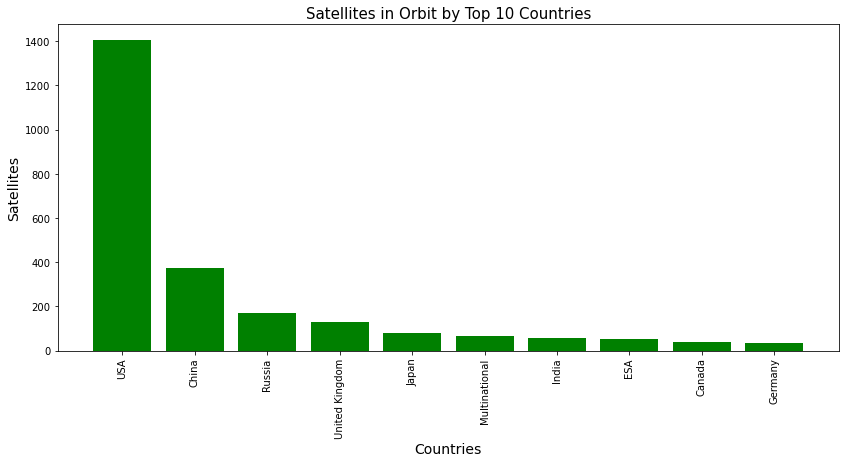

<Figure size 1080x288 with 0 Axes>

In [12]:
#satellites by top 10 countries for bar chart 

countries = ["USA", "China", "Russia","United Kingdom", "Japan", "Multinational", "India", "ESA", "Canada", "Germany"]
satellites = [1406, 375, 170, 129, 80, 64, 58, 53, 39, 33]
x_axis = np.arange(len(satellites))
y_axis = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(14,6))
plt.bar(x_axis, satellites, color="g", align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, size= 10, rotation=90)

plt.title("Satellites in Orbit by Top 10 Countries", fontsize=15)
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Satellites", fontsize=14)
plt.figure(figsize = (15, 4))
plt.savefig("OrbitalSatellites.png")

plt.show()

In [13]:
#extracted satellites used solely for military
military_use_defined = cleaned_satellite_df[(cleaned_satellite_df['Users'] == 'Military')]
military_use_defined


,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
10,USA 139,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,-26.00,...,0.0,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336,ELINT.,JM/12_08,1998
11,USA 171,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,95.40,...,0.0,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937,Electronic intelligence (ELINT).,JM/12_08,2003
12,USA 202,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,44.00,...,0.0,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2009-001A,33490,ELINT.,SC - ASCR,2009
13,USA 223,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,100.90,...,0.0,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2010-063A,37232,ELINT.,SC - ASCR,2010
14,USA 237,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,60.00,...,0.0,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2012-034A,38528,ELINT.,CalSky,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,Yaogan 30-18,NR (4/20),China,People's Liberation Army (C41),Military,Earth Observation,Unknown,LEO,Non-Polar Inclined,0.00,...,0.0,Innovation Academy for Microsatellites (CAS),China,Xichang Satellite Launch Center,Long March 2C,2020-021C,45462,Unknown,Zarya,2020
2736,Yaogan 32-1-2,China,China,People's Liberation Army (C41),Military,Earth Observation,Earth Science,LEO,Sun-Synchronous,0.00,...,0.0,China Academy of Space Technology (CAST),China,Jiuquan Satellite Launch Center,Long March 2C,2018-077B,43643,Unknown,JMSatcat/11_18,2018
2750,Ziyuan 2C,China,China,China Academy of Space Technology (CAST),Military,Earth Observation,Unknown,LEO,Sun-Synchronous,0.00,...,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2004-044A,28470,Third digital imaging spacecraft launched by C...,www.spacedebris.net 12/12,2004
2760,Zhongxing 1A,China,China,People's Liberation Army (C41),Military,Communications,Unknown,GEO,Unknown,129.84,...,0.0,China Academy of Space Technology (CAST),China,Xichang Satellite Launch Center,Long March 3B,2011-047A,37804,Possible replacement for Zhongxing 22A.,JM/1_12,2011


In [14]:
#count how many satellites are used  for military 
military_use = military_use_defined['Users'].value_counts()
military_use

Military    357
Name: Users, dtype: int64

In [15]:
#extracted satellites used solely for commercial
commercial_use_defined = cleaned_satellite_df[(cleaned_satellite_df['Users'] == 'Commercial')]
commercial_use_defined

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,2019
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,75.0,...,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA,2014
5,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,-75.0,...,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588,Unknown,Estimated,2016
6,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,-3.0,...,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.,NaN,2015
7,ABS-4,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,75.0,...,12.0,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.,JM/12_08,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,OHS-8,NR (11/19),China,Zhuhai Orbita Control Engineering Co. Ltd.,Commercial,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,0.0,Zhuhai Orbita Control Engineering Co. Ltd.,China,Jiuquan Satellite Launch Center,Long March 11,2019-060F,44539,Unknown,JMSatcat/11_19,2019
2778,OVS-1A,China,China,Zhuhai Orbita Control Engineering Co. Ltd.,Commercial,Earth Observation,Unknown,LEO,Non-Polar Inclined,0.0,...,0.0,Zhuhai Orbita Control Engineering Co. Ltd.,China,Jiuquan Satellite Launch Center,Long March 4B,2017-034D,42761,"Will record high-resolution video from orbit, ...",JMSatcat10_17,2017
2779,OVS-1B,China,China,Zhuhai Orbita Control Engineering Co. Ltd.,Commercial,Earth Observation,Unknown,LEO,Non-Polar Inclined,0.0,...,0.0,Zhuhai Orbita Control Engineering Co. Ltd.,China,Jiuquan Satellite Launch Center,Long March 4B,2017-034B,42759,"Will record high-resolution video from orbit, ...",JMSatcat10_17,2017
2780,OVS-2A,NR,China,Zhuhai Orbita Control Engineering Co. Ltd.,Commercial,Earth Observation,Unknown,LEO,Sun-Synchronous,0.0,...,0.0,Zhuhai Orbita Control Engineering Co. Ltd.,China,Jiuquan Satellite Launch Center,Long March 11,2018-040B,43440,"Will record high-resolution video from orbit, ...",JMSatcat10_18,2018


In [16]:
#count how many satellites are used  for military 
commercial_use = commercial_use_defined['Users'].value_counts()
commercial_use

Commercial    1514
Name: Users, dtype: int64

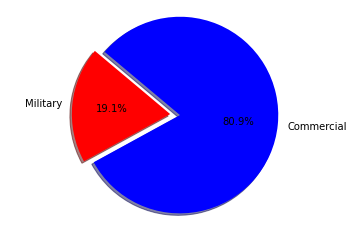

In [17]:
use = ["Military", "Commercial"]
uses = [357, 1514]
colors = ["red","blue"]
explode = (0.1,0)
             
plt.pie(uses, explode=explode, labels=use, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("Purpose.png")
plt.show()


In [18]:
#countries with a purpose for earth observation 
earth_observation = cleaned_satellite_df[(cleaned_satellite_df['Purpose'] == 'Earth Observation')]
earth_observation.head(10)
 

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,2019
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,0.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50,2016
10,USA 139,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,-26.0,...,0.0,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336,ELINT.,JM/12_08,1998
11,USA 171,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,95.4,...,0.0,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937,Electronic intelligence (ELINT).,JM/12_08,2003
12,USA 202,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,44.0,...,0.0,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2009-001A,33490,ELINT.,SC - ASCR,2009
13,USA 223,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,100.9,...,0.0,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2010-063A,37232,ELINT.,SC - ASCR,2010
14,USA 237,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,60.0,...,0.0,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2012-034A,38528,ELINT.,CalSky,2012
15,USA 268,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Unknown,102.6,...,0.0,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2016-036A,41584,ELINT.,ZARYA,2016
22,Aeolus,ESA,ESA,European Space Agency (ESA),Government,Earth Observation,Earth Science,LEO,Unknown,0.0,...,3.0,Airbus Defense and Space,France/UK/Germany/Spain,Guiana Space Center,Vega,2018-066A,43600,Aeolus will precisely measure wind flow and ai...,JMSatcat/11_18,2018
43,AIM,USA,USA,"Center for Atmospheric Sciences, Hampton Unive...",Government,Earth Observation,Earth Science,LEO,Sun-Synchronous,0.0,...,2.0,Orbital Sciences Corp.,USA,Vandenberg AFB,Pegasus XL,2007-015A,31304,Study noctilucent clouds (NLC) in the polar me...,www.satellitedebris.net 12/12,2007


In [19]:
#countries with earth observing satellites
earth_observation_countries = earth_observation[['Country of Operator/Owner', 'Purpose']]
earth_observation_countries

,Country of Operator/Owner,Purpose
0,USA,Earth Observation
3,Denmark,Earth Observation
10,USA,Earth Observation
11,USA,Earth Observation
12,USA,Earth Observation
...,...,...
2782,China,Earth Observation
2783,China,Earth Observation
2784,China,Earth Observation
2785,China,Earth Observation


In [20]:
#grouped by country
grouped_earth_observing = earth_observation_countries['Country of Operator/Owner'].value_counts()
grouped_earth_observing

USA              352
China            177
Japan             33
Russia            29
India             23
                ... 
Taiwan             1
France/Italy       1
Hungary            1
Sudan              1
France/Israel      1
Name: Country of Operator/Owner, Length: 67, dtype: int64